TFG

In [1]:
import pandas as pd

# import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

testing the matrix build

In [ ]:
# read data
csv_hour_file = '../data/hour_14_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'MarginalES']]

# Date range for the matrix
start_date = '2018-01-01'
end_date = '2023-01-01'

subset_df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

##### 

# probar con eso tambien
# error de retorno con 0s
# sumarle 0,001 a todo para que nunca sea 0
# limpiar numeros negativos

# benchmark 1 precios absolutos
# benchmark 2 precios relativos
# benchmark 3 indicadores tecnicos
    # 1. media movil
    # 2. momentum
    # 3. RSI
    # 4. añdir los precios absolutos o relativos
# benchmark 4 random forest



# precios reales y precios relativos

# Sliding window size
window_size = 7

In [3]:
# Function to create sliding windows of data
def create_sliding_window(data, window_size):
    X, y = [], []  # Initialize lists for input features (X) and target values (y)
    
    for i in range(len(data) - window_size):
        # Extract a window of size 'window_size' from the data
        X.append(data.iloc[i:i+window_size, 1:].values.flatten())  
        
        # The label is the value right after the current window
        y.append(data.iloc[i + window_size, 1])  
    
    # Convert the lists to DataFrame/Series for easier use in training
    return pd.DataFrame(X), pd.Series(y)

In [4]:
# Create sliding window matrix
X, y = create_sliding_window(subset_df, window_size)

Print to check the matrix

In [5]:
# print the shape of the matrix
print(X.shape, y.shape)

# print the actual matrix
print(X.head())
print(y.head())

(1820, 7) (1820,)
       0      1      2      3      4      5      6
0   2.30  48.02  52.00  48.19  52.02  52.07  54.07
1  48.02  52.00  48.19  52.02  52.07  54.07  69.42
2  52.00  48.19  52.02  52.07  54.07  69.42  57.55
3  48.19  52.02  52.07  54.07  69.42  57.55  49.54
4  52.02  52.07  54.07  69.42  57.55  49.54  54.83
0    69.42
1    57.55
2    49.54
3    54.83
4    63.86
dtype: float64


Build a simple regression model and train with the matrix

Mean squared error: 457.92463740151385
R2 score: 0.8761120536077138
Actual vs Predicted
    Actual  Predicted
0    69.42  45.846795
1    57.55  62.329348
2    49.54  57.142805
3    54.83  53.943083
4    63.86  54.009742
5    59.07  58.484634
6    58.11  60.003968
7    60.90  61.950695
8    56.16  59.297653
9    54.97  55.790949
10   60.41  57.169061
11   55.40  60.237127
12   53.01  56.887359
13   47.93  56.439255
14   58.01  52.233049
15   60.02  56.423490
16   55.83  58.110340
17   56.92  58.350204
18   49.20  57.603360
19   51.09  51.195614


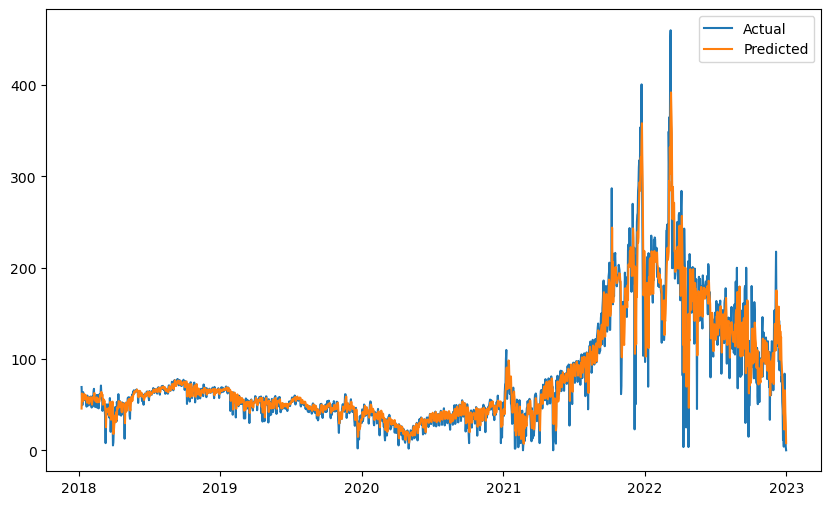

In [6]:
# Build a simple regression model and train with the matrix
model_lr = LinearRegression()
model_lr.fit(X, y)

# llamar a fit con toda la matriz, con la anchura ventana deslizante
# y altura num of days back

# Predict the target values
y_pred = model_lr.predict(X)

# llamar a predict con solo una fila (ancho)

# Calculate the mean squared error and R2 score
mse = mean_squared_error(y, y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y, y_pred)
print('R2 score:', r2)

# Print 20 y and y_pred to visualize the difference
print('Actual vs Predicted')
print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
plt.legend()
plt.show()

In [7]:
# # Build a simple random forest model and train with the matrix
# model_rf = sklearn RandomForest()
# model_rf.fit(X, y)

# # llamar a fit con toda la matriz, con la anchura ventana deslizante
# # y altura num of days back

# # Predict the target values
# y_pred = model_rf.predict(X)

# # llamar a predict con solo una fila (ancho)

# # Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

SyntaxError: invalid syntax (2580144406.py, line 2)